In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from approachfunctions import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
#We are trying to predict stock closing price indices for four stock namely - Cipla, Dr. Reddys, Lupin and Sun Pharma
#So first import the data of these stocks 
#The data has been downloaded from the historical section of the stock in yahoo finance
stock  = pd.read_csv('data/cipla.bo.csv')
#stock = pd.read_csv('data/drreddy.bo.csv')
#stock  = pd.read_csv('data/lupin.bo.csv')
#stock = pd.read_csv('data/sunpharma.bo.csv')

In [3]:
stock = pre_process(stock)

In [4]:
#lets print few rows from a dataframe to see the attributes in it
stock.head(5)

,date,open,high,low,close,adj_close,volume,month
0,2015-05-04,640.00,681.000000,640.0,674.000000,664.206116,248766,5
1,2015-05-05,675.00,676.000000,657.0,662.500000,652.873169,280677,5
2,2015-05-06,660.25,661.099976,632.0,636.250000,627.004639,197474,5
3,2015-05-07,632.00,642.299988,621.0,628.400024,619.268738,359662,5
4,2015-05-08,631.00,659.250000,631.0,653.700012,644.201050,145974,5


In [5]:
print(len(stock))

985


In [6]:
#define train, cross validation and test set sizes
length = len(stock)
train_size = int(0.6*length)
cv_size = int(0.2*length)
test_size = int(0.2*length)

#print(train_size, cv_size, test_size)
train    = stock[:train_size]
cv       = stock[train_size:train_size+cv_size]
train_cv = stock[:train_size+cv_size]
test     = stock[-test_size:]

In [7]:
#In the stock price index prediction we predict the stock price based on the closing prices of the historical stock data 
#We will define the different approaches for prediction and import them in this notebook
RMSE = []
MAPE = []
for N in range(1, 15):
    #perform prediction on the validation set
    pred = moving_average(train_cv, train_size, N)
    #adding pred column to the cross validation data set
    cv.loc[:,'pred_N'+str(N)] = pred
    #cv['pred_N'+str(N)] = pred
    #print(pred.size)
    #print(y_true.size)
    RMSE.append(findRMSE(cv, pred, cv_size))
    MAPE.append(findMAPE(cv, pred, cv_size))
        
print(RMSE)
print(MAPE)

[9.800193890327167, 10.69906423337854, 11.95366918388494, 13.150395077387214, 14.179154381485375, 15.100145636286788, 15.94764466954542, 16.7327573397555, 17.427153084036895, 18.051620569460404, 18.649934389611726, 19.27306365109818, 19.90802444074167, 20.57370267437614]
[1.1276535684959226, 1.3052099094832026, 1.5235137137606933, 1.7246830213702509, 1.891030250580835, 2.0467353128083876, 2.1859071625867763, 2.3057366618658524, 2.3978811711128154, 2.4909090129216502, 2.5783777028158985, 2.664278828730037, 2.7476911186593336, 2.830538176683841]


Text(0.5,1,'Variation of RMSE with chosen last N steps for moving average for Cipla stock on Cross validation set')

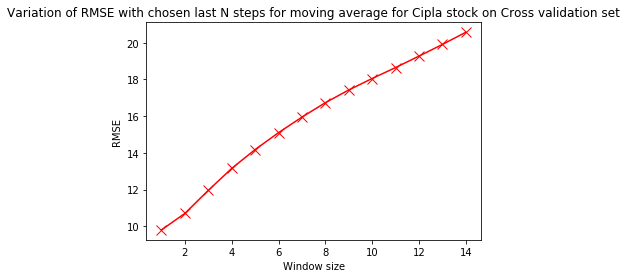

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,15), RMSE, 'x-', c='r', ms = 10)
plt.xlabel('Window size')
plt.ylabel('RMSE')
plt.title('Variation of RMSE with chosen last N steps for moving average for Cipla stock on Cross validation set')


Text(0.5,1,'Variation of MAPE with chosen last N steps for moving average for Cipla stock on Cross validation set')

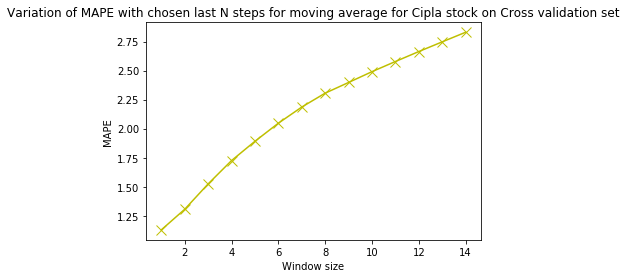

In [9]:
plt.plot(range(1,15), MAPE,'x-', c='y', ms = 10)
plt.xlabel('Window size')
plt.ylabel('MAPE')
plt.title('Variation of MAPE with chosen last N steps for moving average for Cipla stock on Cross validation set')

Text(0.5,1,'Closing price variation plotted with actual and predicted values on CV set for Cipla')

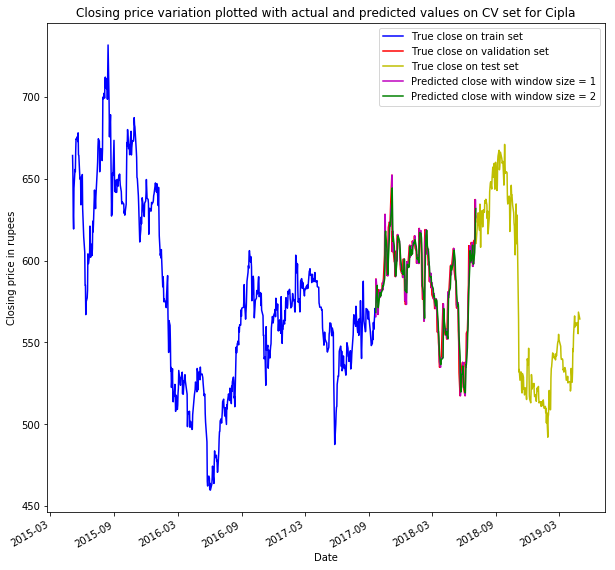

In [10]:
from pylab import rcParams

rcParams['figure.figsize'] = 10,10

ax = train.plot(x='date', y='adj_close', c='b', label='True close on train set')
ax = cv.plot(x='date', y='adj_close', c = 'r',ax=ax, label = 'True close on validation set')
ax = test.plot(x='date', y='adj_close', c='y', ax=ax, label='True close on test set')
ax = cv.plot(x='date', y='pred_N1', c='m',ax=ax, label='Predicted close with window size = 1')
ax = cv.plot(x='date', y='pred_N2', c='g', ax=ax, label='Predicted close with window size = 2')
plt.xlabel("Date")
plt.ylabel("Closing price in rupees")
plt.title("Closing price variation plotted with actual and predicted values on CV set for Cipla")

In [11]:
#Now we choose window size = 2 and do predictions on test set
test_pred = moving_average(stock, train_size+test_size, 2)
RMSE_test = findRMSE(test, test_pred, test_size)
MAPE_test = findMAPE(test, test_pred, test_size)
test.loc[:, 'test_pred'] = test_pred

print(RMSE[1], MAPE[1])
print(RMSE_test, MAPE_test)

10.69906423337854 1.3052099094832026
9.578872191262809 1.1087954840586014


Text(0.5,1,'Closing price variation plotted with actual and predicted values on validation set for Cipla')

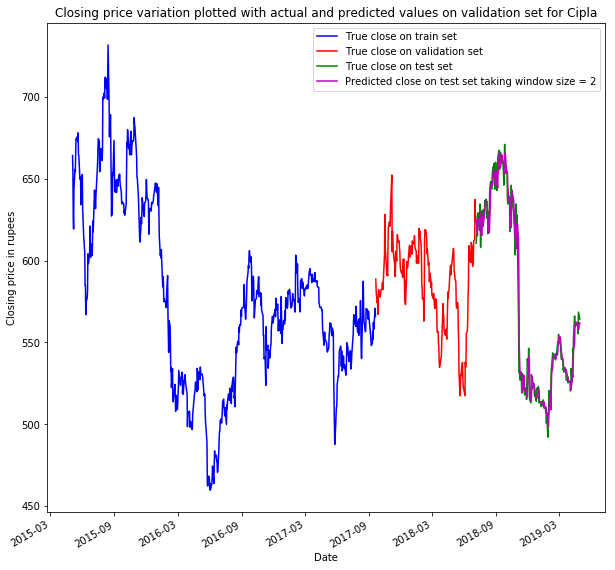

In [14]:
ax = train.plot(x='date', y='adj_close', c='b', label = 'True close on train set')
ax = cv.plot(x='date', y='adj_close', c = 'r',ax=ax, label = 'True close on validation set')
ax = test.plot(x='date', y='adj_close', c='g', ax=ax, label = 'True close on test set')
ax = test.plot(x='date', y='test_pred', c='m',ax=ax, label = 'Predicted close on test set taking window size = 2')
plt.xlabel("Date")
plt.ylabel("Closing price in rupees")
plt.title("Closing price variation plotted with actual and predicted values on validation set for Cipla")

Text(0.5,1,'Closing price variation plotted with actual and predicted values on test set for Cipla')

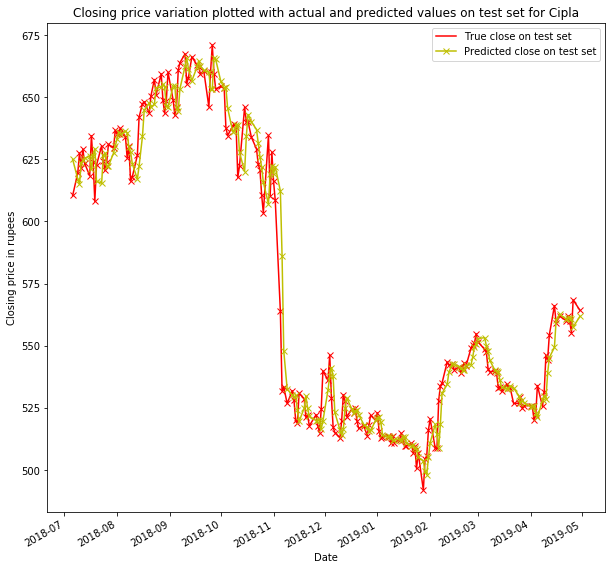

In [24]:
#Zooming to Test validation set
ax = test.plot(x='date', y='adj_close', style='rx-', label = 'True close on test set')
ax = test.plot(x='date', y='test_pred', style='yx-', label = 'Predicted close on test set',ax=ax)
plt.xlabel("Date")
plt.ylabel("Closing price in rupees")
plt.title("Closing price variation plotted with actual and predicted values on test set for Cipla")